# **Feature Engineering**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import f_oneway
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
df = pd.read_csv('data/data_wranggled.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.shape

(20640, 10)

In [5]:
train_df = df.copy()
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
train_df.shape

(20640, 10)

In [7]:
numerical_col = [feature for feature in train_df.columns if train_df[feature].dtype == 'float64']
numerical_col

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

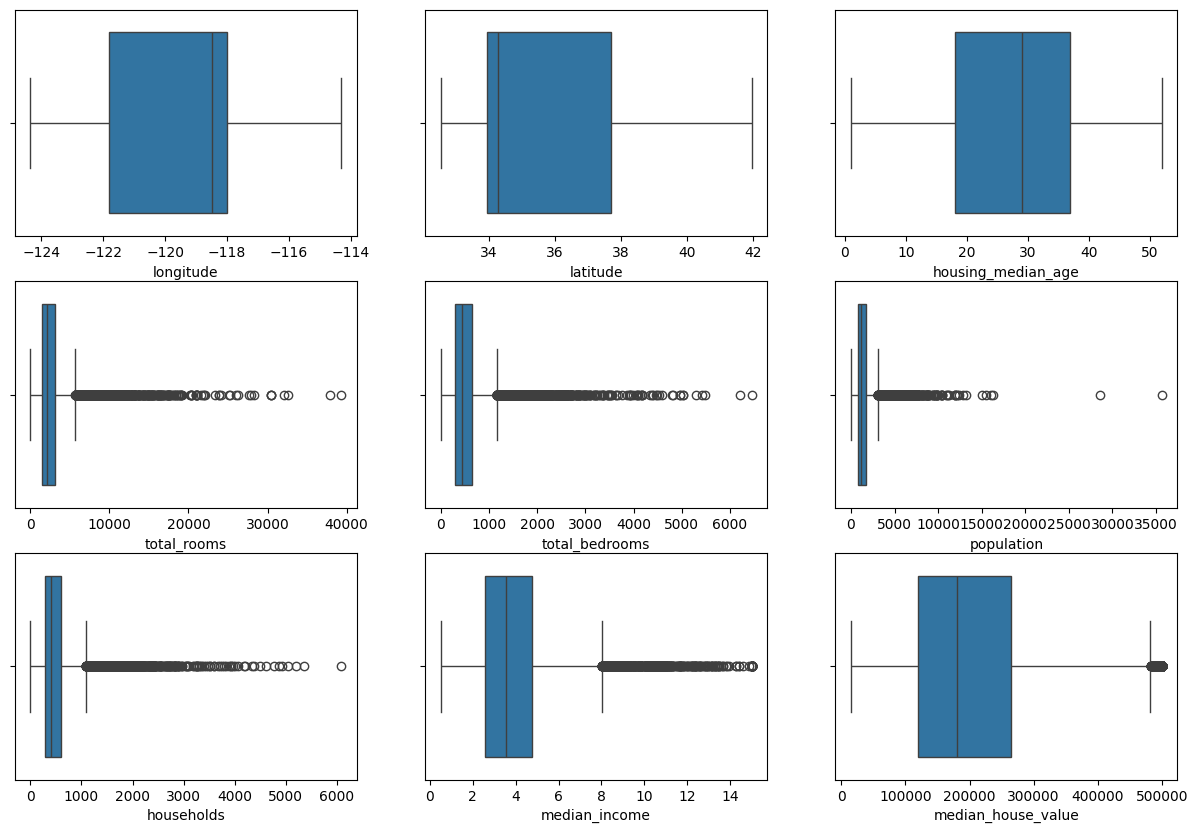

In [8]:
fix, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

for i, column in enumerate(numerical_col):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(x=df[column], ax=ax, )
    ax.set_xlabel(column)


plt.show()

In [9]:
def remove_outliners_IQR(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return data[(data[col] > lower_bound) & (data[col] < upper_bound)]

In [10]:
import_col = ['total_rooms','total_bedrooms','population', 'households', 'median_income']

for col in import_col:
    train_df = remove_outliners_IQR(train_df, col)

print(train_df.isna().sum())
print(train_df.shape)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
(17532, 10)


In [11]:
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


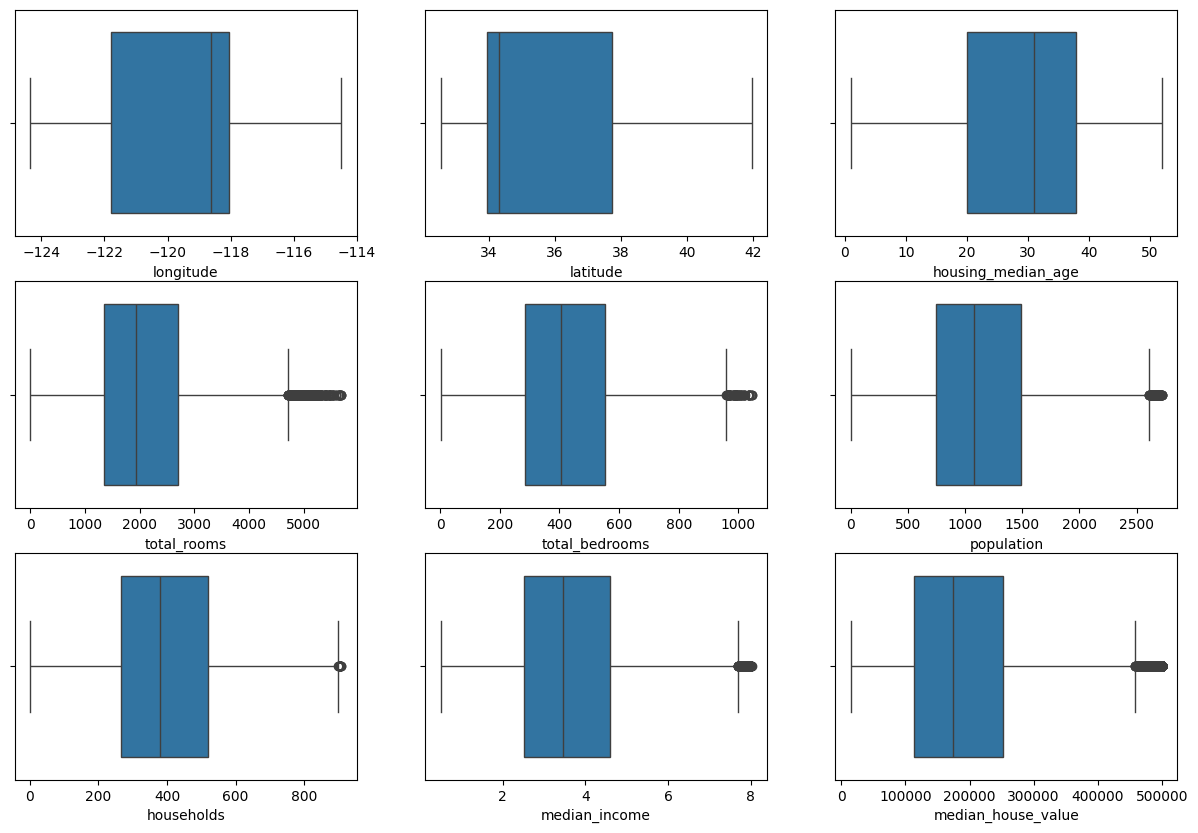

In [12]:
fix, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

for i, column in enumerate(numerical_col):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(x=train_df[column], ax=ax, )
    ax.set_xlabel(column)


plt.show()

In [13]:
train_df.to_csv('data/clean.csv')